In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finpy_tse as tse
import yfinance as yf

In [2]:
def intersect(data1, data2):
    l = []
    if len(data1) > len(data2):
        for i in data1:
            for j in data2:
                if i == j:
                    l.append(i)
                    break
    else:
        for i in data2:
            for j in data1:
                if i == j:
                    l.append(i)
                    break
    #l = list(set(l))
    return np.array(l)

In [3]:
#tehran_stock
tehran_stock = tse.Get_CWI_History(ignore_date=True, double_date=True)
tehran_stock.index = tehran_stock.Date
tehran_stock.drop('Date', axis=1, inplace=True)
#gold_domestic
gold_irr = tse.Get_Price_History(stock='طلا', ignore_date=True, double_date=True)
gold_irr.index = gold_irr.Date
gold_irr.drop(['Date','Ticker','No','Value','Final','Name','Market'], axis=1, inplace=True)
#usd_irr
usd_irr = tse.Get_USD_RIAL(ignore_date=True, double_date=True)
usd_irr.index = usd_irr.Date
usd_irr.drop('Date', axis=1, inplace=True)
#bitcoin
bitcoin = yf.download('BTC-USD', period='max', interval='1d')
#gold_usd
gold_usd = yf.download('GC=F', period='max', interval='1d')
#pack_data:
index = [tehran_stock, gold_irr, usd_irr, bitcoin, gold_usd]
#Name
name_dict={0:'TSE',1:'Gold_domestic',2:'USDIRR',3:'BITCOIN',4:'Gold_world'}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
tehran_stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...
2023-03-13,1783610.0,1789170.0,1781620.0,1781632.0,1781632.1,7154751749
2023-03-14,1781890.0,1784010.0,1781890.0,1782988.0,1782987.7,7024872831
2023-03-15,1784520.0,1820990.0,1784520.0,1820988.0,1820987.6,10083167057


In [5]:
gold_irr

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-10,10000,10000,10000,10000,7842985
2017-06-11,10000,10000,10000,10000,384820
2017-06-12,10000,10000,10000,10000,4095892
2017-06-13,10000,10000,10000,10000,280021
2017-06-14,10000,10000,10000,10000,3196327
...,...,...,...,...,...
2023-03-13,171900,171900,168210,170455,11113587
2023-03-14,174016,179250,174000,179180,21486069
2023-03-15,180000,182000,177800,179000,11297255


In [6]:
usd_irr

,Open,High,Low,Close
Date,,,,
2011-11-27,13700,13700,13700,13700
2011-11-28,13440,13440,13440,13440
2011-11-29,13350,13350,13350,13350
2011-11-30,13400,13400,13400,13400
2011-12-01,13500,13500,13500,13500
...,...,...,...,...
2023-03-14,445300,459910,445000,459910
2023-03-15,461960,462100,451820,460460
2023-03-16,452940,456600,448300,456320


In [7]:
bitcoin

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-03-20,28041.601562,28527.724609,27242.880859,27767.236328,27767.236328,44774027664
2023-03-21,27768.392578,28439.562500,27439.646484,28175.816406,28175.816406,36102192830
2023-03-22,28158.720703,28803.335938,26759.996094,27307.437500,27307.437500,33382021890


In [8]:
gold_usd

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...
2023-03-20,1988.300049,2003.900024,1968.900024,1979.199951,1979.199951,389
2023-03-21,1973.800049,1973.800049,1938.000000,1938.000000,1938.000000,47
2023-03-22,1946.800049,1974.000000,1946.800049,1946.800049,1946.800049,50


In [9]:
index1=intersect(tehran_stock.index,intersect(gold_irr.index,intersect(usd_irr.index,intersect(gold_usd.index,bitcoin.index))))
column1=intersect(tehran_stock.columns,intersect(gold_irr.columns,intersect(usd_irr.columns,intersect(gold_usd.columns,bitcoin.columns))))

In [10]:
index1

array([Timestamp('2017-06-12 00:00:00'), Timestamp('2017-06-13 00:00:00'),
       Timestamp('2017-06-14 00:00:00'), Timestamp('2017-07-31 00:00:00'),
       Timestamp('2017-08-01 00:00:00'), Timestamp('2017-08-02 00:00:00'),
       Timestamp('2017-08-07 00:00:00'), Timestamp('2017-08-08 00:00:00'),
       Timestamp('2017-08-09 00:00:00'), Timestamp('2017-08-14 00:00:00'),
       Timestamp('2017-08-15 00:00:00'), Timestamp('2017-08-16 00:00:00'),
       Timestamp('2017-08-21 00:00:00'), Timestamp('2017-08-22 00:00:00'),
       Timestamp('2017-08-23 00:00:00'), Timestamp('2017-08-28 00:00:00'),
       Timestamp('2017-08-29 00:00:00'), Timestamp('2017-08-30 00:00:00'),
       Timestamp('2017-09-05 00:00:00'), Timestamp('2017-09-06 00:00:00'),
       Timestamp('2017-09-11 00:00:00'), Timestamp('2017-09-12 00:00:00'),
       Timestamp('2017-09-13 00:00:00'), Timestamp('2017-09-18 00:00:00'),
       Timestamp('2017-09-19 00:00:00'), Timestamp('2017-09-20 00:00:00'),
       Timestamp('2017-09

In [11]:
column1

array(['Open', 'High', 'Low', 'Close'], dtype='<U5')

In [13]:
tehran_stock_int=tehran_stock.loc[index1,column1]
gold_irr_int=gold_irr.loc[index1,column1]
usd_irr_int=usd_irr.loc[index1,column1]
bitcoin_int=bitcoin.loc[index1,column1]
gold_usd_int=gold_usd.loc[index1,column1]

In [14]:
bitcoin_int/gold_usd_int

,Open,High,Low,Close
Date,,,,
2017-06-12,2.331980,2.361349,1.993794,2.100648
2017-06-13,2.120805,2.201468,2.103977,2.146484
2017-06-14,2.140287,2.180618,1.919908,1.969178
2017-07-31,2.177666,2.273859,2.149321,2.270125
2017-08-01,2.263718,2.294314,2.128059,2.135989
...,...,...,...,...
2023-03-06,12.106413,12.182702,12.108944,12.137971
2023-03-07,12.183346,12.237176,12.134771,12.249721
2023-03-13,11.718006,12.833014,11.689083,12.657600


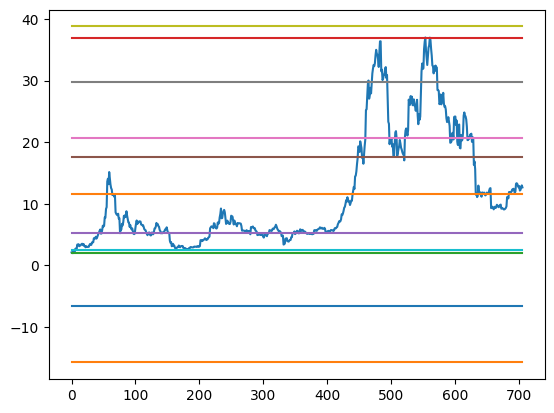

In [24]:
plt.plot((bitcoin_int/gold_usd_int).Close.values)
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.min((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.max((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.quantile((bitcoin_int/gold_usd_int).Close.values,0.25)]*len(bitcoin_int.index))
plt.plot([np.quantile((bitcoin_int/gold_usd_int).Close.values,0.75)]*len(bitcoin_int.index))
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)+np.std((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)+2*np.std((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)+3*np.std((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)-np.std((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)-2*np.std((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))
plt.plot([np.mean((bitcoin_int/gold_usd_int).Close.values)-3*np.std((bitcoin_int/gold_usd_int).Close.values)]*len(bitcoin_int.index))

In [26]:
bitcoin_int*usd_irr_int

,Open,High,Low,Close
Date,,,,
2017-06-12,1.102732e+08,1.119477e+08,9.391710e+07,9.920419e+07
2017-06-13,1.000247e+08,1.040591e+08,9.877966e+07,1.012633e+08
2017-06-14,1.012853e+08,1.039766e+08,8.993027e+07,9.348761e+07
2017-07-31,1.053071e+08,1.101812e+08,1.036552e+08,1.096367e+08
2017-08-01,1.095114e+08,1.116248e+08,1.024292e+08,1.038103e+08
...,...,...,...,...
2023-03-06,1.117353e+10,1.137322e+10,1.102787e+10,1.118998e+10
2023-03-07,1.085441e+10,1.125470e+10,1.059402e+10,1.091768e+10
2023-03-13,9.600371e+09,1.105524e+10,9.490580e+09,1.084461e+10


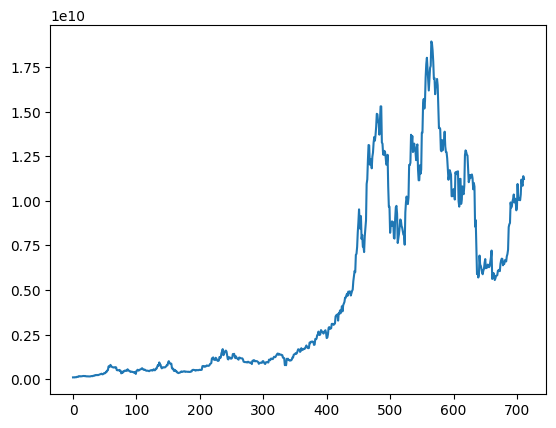

In [27]:
plt.plot((bitcoin_int*usd_irr_int).Close.values)

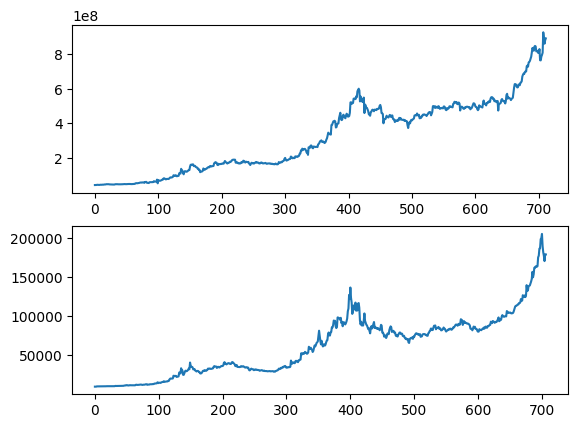

In [33]:
plt.subplot(2,1,1)
plt.plot((gold_usd_int*usd_irr_int).Close.values)
plt.subplot(2,1,2)
plt.plot(gold_irr_int.Close.values)

,Open,High,Low,Close
Date,,,,
2017-06-12,10000,10000,10000,10000
2017-06-13,10000,10000,10000,10000
2017-06-14,10000,10000,10000,10000
2017-07-31,10319,10329,10308,10325
2017-08-01,10322,10328,10312,10315
...,...,...,...,...
2023-03-06,184000,185300,181680,181680
2023-03-07,179000,179060,175005,177120
2023-03-13,171900,171900,168210,170455
